In [2]:
pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 19.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184505 sha256=323aaca6bfe5023de08ae6901a0099a1f1dc39381444e4a9f331d7cf54bc1682
  Stored in directory: /root/.cache/pip/wheels/83/8b/7c/09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx


In [3]:
import pandas as pd
import docx
from google.colab import files

# Use the files.upload() method to upload a file
uploaded_file = files.upload()
uploaded_file = files.upload()

Saving 8_29 to 9_4.docx to 8_29 to 9_4.docx
Saving 9_5 to 9_11.docx to 9_5 to 9_11.docx
Saving 9_12 to 9_18.docx to 9_12 to 9_18.docx
Saving 9_19 to 9_25.docx to 9_19 to 9_25.docx
Saving 9_26 to 10_2.docx to 9_26 to 10_2.docx
Saving 10_3 to 10_9.docx to 10_3 to 10_9.docx
Saving 10_10 to 10_16.docx to 10_10 to 10_16.docx
Saving 10_17 to 10_23.docx to 10_17 to 10_23.docx
Saving 10_24 to 10_30.docx to 10_24 to 10_30.docx
Saving 10_31 to 11_6.docx to 10_31 to 11_6.docx
Saving 11_7 to 11_13.docx to 11_7 to 11_13.docx
Saving 11_14 to 11_20.docx to 11_14 to 11_20.docx
Saving 11_21 to 11_27.docx to 11_21 to 11_27.docx
Saving 11_28 to 12_4.docx to 11_28 to 12_4.docx
Saving 12_5 to 12_11.docx to 12_5 to 12_11.docx


Saving 8_22 to 8_28.docx to 8_22 to 8_28.docx


In [4]:
breakfast_df = pd.DataFrame()
lunch_df = pd.DataFrame()
dinner_df = pd.DataFrame()





In [7]:



my_doc = "8_22 to 8_28.docx"

def tablify(document):
  total_df = pd.DataFrame(index=['Breakfast', 'Lunch', 'Dinner'])
  
  breakfast_df = pd.DataFrame(index = ['Breakfast'])
  lunch_df = pd.DataFrame()
  dinner_df = pd.DataFrame()

  doc = docx.Document(document)
  #iterate thru tables in a document
  for i in range(len(doc.tables)):
    table = doc.tables[i]
    data = []
    keys = None
    for i, row in enumerate(table.rows):
        text = [cell.text.strip() for cell in row.cells]
        if i == 0:
            keys = text
        else:
            data.append(text)
    df = pd.DataFrame(data, columns=keys)
    df.columns = ['Meal', 'Description']
    df2= df.copy()
    df2['Description'] = df['Description'].apply(lambda x: x.split('|')[0].strip())
    
    #Creates the new table
    new_df = pd.DataFrame(index=['Breakfast', 'Lunch', 'Dinner'])

    current_meal = None
    current_category = 'Breakfast'

    for index, row in df2.iterrows():
        meal = row['Meal']
        description = row['Description']

        # If the meal column is not empty, update the current_meal variable
        if meal:
            if meal in new_df.index:
                current_category = meal
            else:
                current_meal = meal

        # If the current meal is one of the main meals (Breakfast, Lunch, Dinner), skip the iteration
        if current_meal in new_df.index:
            continue

        # If the meal item column already exists, append the description to the existing column
        if current_meal in new_df.columns:
            new_df.at[current_category, current_meal] = f"{new_df.at[current_category, current_meal]} | {description}"
        else:
            # Otherwise, create a new column for the meal item and set the description
            new_df[current_meal] = pd.Series({current_category: description})
    
    total_df = pd.concat([total_df, new_df])
  
  for index, row in (total_df).iterrows():
      if index == "Breakfast":
        breakfast_df = breakfast_df.append(row)
      elif index == "Lunch":
        lunch_df = lunch_df.append(row)
      elif index == "Dinner":
        dinner_df = dinner_df.append(row)
    
  return total_df

    



df3 = tablify(my_doc)

df3
            



<ipython-input-7-75ef27477740>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakfast_df = breakfast_df.append(row)
<ipython-input-7-75ef27477740>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunch_df = lunch_df.append(row)
<ipython-input-7-75ef27477740>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dinner_df = dinner_df.append(row)
<ipython-input-7-75ef27477740>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakfast_df = breakfast_df.append(row)
<ipython-input-7-75ef27477740>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunc

,herbivore (special),global (special),salad (special),ovens (special),Soup (special),sweets (special),Grill (special),oasis (special)
Breakfast,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dinner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breakfast,smoothie bar,veggie scramble | scrambled eggs | breakfast p...,yogurt parfait bar | self serve fresh fruit ba...,breakfast pastry bar,oatmeal,croissants,NaN,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,NaN,nan | Lunch | Chocolate chip cookies | chocola...,cheeseburger | impossible burger on a gluten f...,chickpea stew | quinoa primavera | roasted zuc...
Dinner,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",nan | margarita pizza | roasted veggie pizza w...,NaN,nan | Dinner | Chocolate chip cookies | chocol...,NaN,nan | chickpea stew | roasted potato | balsami...
Breakfast,smoothie bar,scrambled eggs | marinated cherry tomatoes | h...,yogurt parfait bar | self serve fresh fruit ba...,breakfast pastry bar,oatmeal,NaN,NaN,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,nan | Lunch,Chocolate chip cookies,turkey burger | french fries | impossible cali...,turkey carnitas | black beans | broccoli | mus...
Dinner,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",nan | margarita pizza | sausage & bacon pizza...,NaN,nan | Dinner | Chocolate chip cookies,NaN,nan | Spanish brown rice | baked pesto chicken...
Breakfast,smoothie bar | strawberry smoothie | tropical ...,scrambled tofu | bacon scramble | scrambled eg...,yogurt parfait bar | self serve fresh fruit ba...,breakfast pastry bar,oatmeal,blueberry pecan muffin,NaN,NaN


In [6]:
week1 = tablify("8_22 to 8_28.docx")
week2 = tablify("8_29 to 9_4.docx")
week3 = tablify("9_5 to 9_11.docx")
week4 = tablify("9_12 to 9_18.docx")
week5 = tablify("9_19 to 9_25.docx")
week6 = tablify("9_26 to 10_2.docx")
week7 = tablify("10_3 to 10_9.docx")
week8 = tablify("10_10 to 10_16.docx")
week9 = tablify("10_17 to 10_23.docx")
week10 = tablify("10_24 to 10_30.docx")
week11 = tablify("10_31 to 11_6.docx")
week12 = tablify("11_7 to 11_13.docx")
week13 = tablify("11_14 to 11_20.docx")
week14 = tablify("11_21 to 11_27.docx")
week15 = tablify("11_28 to 12_4.docx")


<ipython-input-5-75ef27477740>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakfast_df = breakfast_df.append(row)
<ipython-input-5-75ef27477740>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunch_df = lunch_df.append(row)
<ipython-input-5-75ef27477740>:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dinner_df = dinner_df.append(row)
<ipython-input-5-75ef27477740>:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakfast_df = breakfast_df.append(row)
<ipython-input-5-75ef27477740>:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunc

In [8]:
dfs = [week1, week2, week3, week4, week5, week6, week7, week8, week9, week10, week11, week12, week13, week14, week15]

# concatenate vertically
df_concat = pd.DataFrame(index = ['Breakfast', 'Lunch', "Dinner"])
df_concat = pd.concat(dfs)

breakfast_df = pd.DataFrame(index = ['Breakfast'])
lunch_df = pd.DataFrame()
dinner_df = pd.DataFrame()

for index, row in (df_concat).iterrows():
      if index == "Breakfast":
        breakfast_df = breakfast_df.append(row)
      elif index == "Lunch":
        lunch_df = lunch_df.append(row)
      elif index == "Dinner":
        dinner_df = dinner_df.append(row)
    

lunch_df

<ipython-input-8-6ee8c92dc91a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakfast_df = breakfast_df.append(row)
<ipython-input-8-6ee8c92dc91a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunch_df = lunch_df.append(row)
<ipython-input-8-6ee8c92dc91a>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dinner_df = dinner_df.append(row)
<ipython-input-8-6ee8c92dc91a>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  breakfast_df = breakfast_df.append(row)
<ipython-input-8-6ee8c92dc91a>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lunc

,herbivore (special),global (special),salad (special),ovens (special),Soup (special),sweets (special),Grill (special),oasis (special),deli (special)
Lunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,NaN,nan | Lunch | Chocolate chip cookies | chocola...,cheeseburger | impossible burger on a gluten f...,chickpea stew | quinoa primavera | roasted zuc...,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,nan | Lunch,Chocolate chip cookies,turkey burger | french fries | impossible cali...,turkey carnitas | black beans | broccoli | mus...,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,NaN,nan | Lunch | Chocolate chip cookies | blueber...,chicken tenders | french fries | classic slaw ...,slow braised short rib with demi | cauliflower...,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,NaN,nan | Lunch | Chocolate chip cookies | cinnamo...,cheeseburger | french fries | impossible burge...,moroccan chicken braise | turmeric brown rice ...,NaN
...,...,...,...,...,...,...,...,...,...
Lunch,falafel wrap | spinach & jackfruit falafel | ...,nan | chicken teriyaki | sticky rice | vegetab...,"nan | self serve salad bar\nSIDES: artisan, mi...",nan | margarita pizza | buffalo chicken pizza ...,nan | chicken & shrimp jambalaya | vegan pumpk...,nan | Lunch | Chocolate chip cookies | blueber...,substitute lettuce wrap for any burger or sand...,pepper steak | jasmine rice | roasted eggplant...,deli bar | slice smoked ham | sliced turkey br...
Lunch,vegan fiesta bowl | black beans | cilantro l...,nan | Indarra Modern Indian Cuisine | Chicken ...,"nan | self serve salad bar\nSIDES: artisan, mi...",nan | fig & brie with prosciutto | roasted veg...,nan | chicken wonton soup | lentil soup,nan | Lunch | Chocolate chip cookies | cinnamo...,fries | impossible burger | habanero fried chi...,roasted stuffed pepper | butternut & sautéed s...,deli bar | sliced turkey breast | fresh sliced...
Lunch,Lentil Buddha bowl | turmeric quinoa | lentil...,nan | chow mein | vegetarian spring rolls | ch...,"nan | self serve salad bar\nSIDES: artisan, mi...",nan | margarita pizza | roasted veggie pizza w...,nan | classic new england clam chowder | lenti...,nan | Lunch | Chocolate chip cookies | blondie,baja inspired fish taco bar | pico de gallo | ...,beef short rib | brown rice pilaf | brussel sp...,deli bar | slice smoked ham | sliced turkey br...
Lunch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from google.colab import files

# Assuming your dataframe is called `df`
breakfast_df.to_csv('breakfast_scripps.csv', index=False)
lunch_df.to_csv('lunch_scripps.csv', index=False)
dinner_df.to_csv('dinner_scripps.csv', index=False)


# Download the CSV file
#files.download('breakfast_scripps.csv')
#files.download('lunch_scripps.csv')
#files.download('dinner_scripps.csv')

In [17]:
Breakfast = pd.get_dummies(breakfast_df)
Lunch = pd.get_dummies(lunch_df)
Dinner = pd.get_dummies(dinner_df)

Breakfast

uploaded_file = files.upload()
df_final = pd.read_csv('Daily_Sums_Mallot (1).csv')





Saving Daily_Sums_Mallot.csv to Daily_Sums_Mallot (2).csv


In [69]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from numpy import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

numpy_swipes = df_final.to_numpy()
numpy_train = Breakfast.to_numpy()
numpy_train = numpy_train[:87,:]

numpy_swipes = numpy_swipes[:87]

where_are_NaNs = isnan(numpy_train)
numpy_train[where_are_NaNs] = 0




print(numpy_swipes.shape)
print(numpy_train.shape)


X_train, X_test, y_train, y_test = train_test_split(numpy_train, numpy_swipes[:,1], test_size=0.33, random_state=42)



y_train = y_train.astype('int')

clf = HistGradientBoostingClassifier()



clf.fit(X_train,y_train)



y_test = y_test.astype('int')

y_pred = clf.predict(X_test)
y_true = y_test

print(y_test)
x_list = []
y_list = []
for i in range(50, 200):
  within_100 = np.abs(y_pred - y_true) <= i
  percentage = np.mean(within_100) * 100
  x_list.append(i)
  y_list.append(percentage)



#print(clf.score(X_test, y_test))



(87, 4)
(87, 134)
[269 439 345 298 290 227 329 225 268 347 236 261 303 229 268 264 308 291
 298 283 290 305 368 269 326 245 347 254 282]


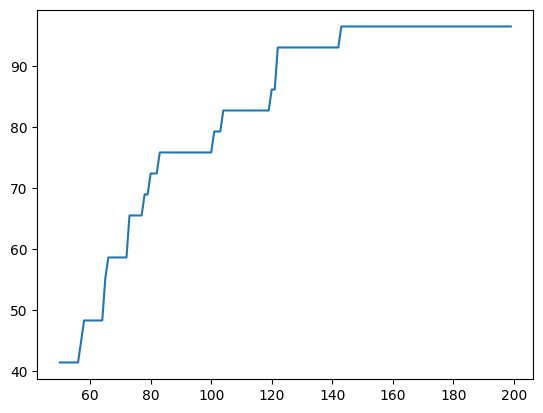

In [70]:
plt.plot(x_list,y_list)
plt.show()

In [ ]:
def main(file):
  B_main = pd.DataFrame()
  L_main = pd.DataFrame()



    my_doc = "8_22 to 8_28.docx"

    def tablify(document):
      total_df = pd.DataFrame(index=['Breakfast', 'Lunch', 'Dinner'])
      
      breakfast_df = pd.DataFrame(index = ['Breakfast'])
      lunch_df = pd.DataFrame()
      dinner_df = pd.DataFrame()

      doc = docx.Document(document)
      #iterate thru tables in a document
      for i in range(len(doc.tables)):
        table = doc.tables[i]
        data = []
        keys = None
        for i, row in enumerate(table.rows):
            text = [cell.text.strip() for cell in row.cells]
            if i == 0:
                keys = text
            else:
                data.append(text)
        df = pd.DataFrame(data, columns=keys)
        df.columns = ['Meal', 'Description']
        df2= df.copy()
        df2['Description'] = df['Description'].apply(lambda x: x.split('|')[0].strip())
        
        #Creates the new table
        new_df = pd.DataFrame(index=['Breakfast', 'Lunch', 'Dinner'])

        current_meal = None
        current_category = 'Breakfast'

        for index, row in df2.iterrows():
            meal = row['Meal']
            description = row['Description']

            # If the meal column is not empty, update the current_meal variable
            if meal:
                if meal in new_df.index:
                    current_category = meal
                else:
                    current_meal = meal

            # If the current meal is one of the main meals (Breakfast, Lunch, Dinner), skip the iteration
            if current_meal in new_df.index:
                continue

            # If the meal item column already exists, append the description to the existing column
            if current_meal in new_df.columns:
                new_df.at[current_category, current_meal] = f"{new_df.at[current_category, current_meal]} | {description}"
            else:
                # Otherwise, create a new column for the meal item and set the description
                new_df[current_meal] = pd.Series({current_category: description})
        
        total_df = pd.concat([total_df, new_df])
      
      for index, row in (total_df).iterrows():
          if index == "Breakfast":
            breakfast_df = breakfast_df.append(row)
          elif index == "Lunch":
            lunch_df = lunch_df.append(row)
          elif index == "Dinner":
            dinner_df = dinner_df.append(row)
        
      return dinner_df

        



    df3 = tablify(my_doc)

  df3
            



In [ ]:
new_df = tablify(my_doc)
new_df

,Grill (special),herbivore (special),global (special),ovens (special),Soup (special),sweets (special),salad (special)
Breakfast,waffle bar | peach in syrup | whipped cream | ...,overnight oat bar | chia seed | mixed berries ...,scrambled egg | breakfast potato | pork patty ...,breakfast pastry bar,oatmeal | tomato bisque | Breakfast,croissants,NaN
Lunch,NaN,NaN,NaN,NaN,NaN,nan | Lunch | Chocolate chip cookies,"self serve salad bar\nSIDES: artisan, mix gree..."
Dinner,nan | french fries | greek turkey sandwich | i...,nan | barbecue chicken | barbecue baby back po...,nan | barbecue chicken | barbecue baby back po...,nan | strawberry cheesecake | chocolate browni...,nan | tomato bisque,nan | Dinner | Chocolate chip cookies | chocol...,"nan | self serve salad bar\nSIDES: artisan, mi..."


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Rename the columns

# Display the resulting DataFrame
df2


,Meal,Description
0,herbivore (special),smoothie bar
1,global (special),veggie scramble
2,,scrambled eggs
3,,breakfast potato
4,,bacon
5,,breakfast vegetarian patty
6,,rice
7,,chickpeas stir fry
8,,marinated cherry tomatoes
9,,roasted cauliflower


In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Create an empty DataFrame with three rows for Breakfast, Lunch, and Dinner
new_df = pd.DataFrame(index=['Breakfast', 'Lunch', 'Dinner'])

# Initialize the current meal variable
current_meal = None
current_category = 'Breakfast'

# Iterate through the rows of the DataFrame
for index, row in df2.iterrows():
    meal = row['Meal']
    description = row['Description']

    # If the meal column is not empty, update the current_meal variable
    if meal:
        if meal in new_df.index:
            current_category = meal
        else:
            current_meal = meal

    # If the current meal is one of the main meals (Breakfast, Lunch, Dinner), skip the iteration
    if current_meal in new_df.index:
        continue

    # If the meal item column already exists, append the description to the existing column
    if current_meal in new_df.columns:
        new_df.at[current_category, current_meal] = f"{new_df.at[current_category, current_meal]} | {description}"
    else:
        # Otherwise, create a new column for the meal item and set the description
        new_df[current_meal] = pd.Series({current_category: description})

# Display the resulting DataFrame
new_df


,herbivore (special),global (special),salad (special),ovens (special),Soup (special),sweets (special),Grill (special),oasis (special)
Breakfast,smoothie bar,veggie scramble | scrambled eggs | breakfast p...,yogurt parfait bar | self serve fresh fruit ba...,breakfast pastry bar,oatmeal,croissants,NaN,NaN
Lunch,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",NaN,NaN,nan | Lunch | Chocolate chip cookies | chocola...,cheeseburger | impossible burger on a gluten f...,chickpea stew | quinoa primavera | roasted zuc...
Dinner,NaN,NaN,"nan | self serve salad bar\nSIDES: artisan, mi...",nan | margarita pizza | roasted veggie pizza w...,NaN,nan | Dinner | Chocolate chip cookies | chocol...,NaN,nan | chickpea stew | roasted potato | balsami...


In [ ]:
df['Breakfast'] = df['Breakfast'].apply(lambda x: str(x).split('|')[0].strip())

# display resulting dataframe
print(df)

                                            Breakfast  \
0   0     herbivore (special)\n1        global (sp...   
1   0     herbivore (special)\n1        global (sp...   
2   0     herbivore (special)\n1        global (sp...   
3   0     herbivore (special)\n1        global (sp...   
4   0     herbivore (special)\n1        global (sp...   
5   0     herbivore (special)\n1        global (sp...   
6   0     herbivore (special)\n1        global (sp...   
7   0     herbivore (special)\n1        global (sp...   
8   0     herbivore (special)\n1        global (sp...   
9   0     herbivore (special)\n1        global (sp...   
10  0     herbivore (special)\n1        global (sp...   
11  0     herbivore (special)\n1        global (sp...   
12  0     herbivore (special)\n1        global (sp...   
13  0     herbivore (special)\n1        global (sp...   
14  0     herbivore (special)\n1        global (sp...   
15  0     herbivore (special)\n1        global (sp...   
16  0     herbivore (special)\n